In [1]:
import datetime
import os
from pyscripts import pffrocd
import configparser
import time
import pandas as pd
import numpy as np
from deepface import DeepFace
import dlib
import matplotlib.pyplot as plt

In [2]:
N = 100
MODELS = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  #"DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

current_datetime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

metrics = ["cosine", "euclidean"]

columns = ["computed_result", "actual_result", "model", "metric"]

results = []

# get the list of people that have more than one image
people = pffrocd.get_people_with_multiple_images(root_dir='lfw')

# run for all the people with multiple images
for count_person, person in enumerate(people):
    # check if should break
    if count_person > N:
        break
    # get all images from person
    imgs = pffrocd.get_images_in_folder(person)
    print(f"Currently running for {person} ({count_person+1}/{len(people)})")
    print(f"Found {len(imgs)} images for {person}")

    # set the first image as the 'reference' image (registered at the service provider) and remove it from the list of images
    ref_img = imgs[0]
    imgs = imgs[1:]
    print(f"setting image as reference image: {ref_img}")

    # get as many images of other people as there are of that person
    other_imgs = pffrocd.get_random_images_except_person(root_dir='lfw', excluded_person=person, num_images=len(imgs))

    # join the two list of images together
    imgs = imgs + other_imgs

    # run the test for each image
    for count_img,img in enumerate(imgs):
        print(f"Running test for {img}")
        
        for model in MODELS:
            #print(f"Running tests for {model}")
            for metric in metrics: 
                is_same_person = ref_img.split('/')[1] == img.split('/')[1] 
                result = DeepFace.verify(img1_path = ref_img, img2_path = img, model_name = model, distance_metric = metric, enforce_detection=False)
                results.append({'computed_result':result.get('verified'),
                                'actual_result':is_same_person,
                                'model':result.get('model'),
                                'metric':result.get('similarity_metric'),
                                'time':result.get('time')})
                    

df = pd.DataFrame(results)
df['model_correct'] = df['computed_result'] == df['actual_result']
output_path = f"model_comparisons/N={N}_{current_datetime}.csv"
df.to_csv(output_path)

Currently running for lfw/Aaron_Peirsol (1/1680)
Found 4 images for lfw/Aaron_Peirsol
setting image as reference image: lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
Running test for lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
Running test for lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
Running test for lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
Running test for lfw/Erin_Runnion/Erin_Runnion_0004.jpg
Running test for lfw/Oscar_de_la_Renta/Oscar_de_la_Renta_0001.jpg
Running test for lfw/Doug_Wilson/Doug_Wilson_0001.jpg
Currently running for lfw/Aaron_Sorkin (2/1680)
Found 2 images for lfw/Aaron_Sorkin
setting image as reference image: lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
Running test for lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
Running test for lfw/Wayne_Allard/Wayne_Allard_0001.jpg
Currently running for lfw/Abdel_Nasser_Assidi (3/1680)
Found 2 images for lfw/Abdel_Nasser_Assidi
setting image as reference image: lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
Running test for lfw/Abdel_Nasser_A

Running test for lfw/Cindy_Taylor/Cindy_Taylor_0001.jpg
Currently running for lfw/Adrian_Nastase (17/1680)
Found 2 images for lfw/Adrian_Nastase
setting image as reference image: lfw/Adrian_Nastase/Adrian_Nastase_0001.jpg
Running test for lfw/Adrian_Nastase/Adrian_Nastase_0002.jpg
Running test for lfw/Prakash_Hinduja/Prakash_Hinduja_0001.jpg
Currently running for lfw/Adrien_Brody (18/1680)
Found 12 images for lfw/Adrien_Brody
setting image as reference image: lfw/Adrien_Brody/Adrien_Brody_0001.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0002.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0003.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0004.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0005.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0006.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0007.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0008.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_0009.jpg
Running test for lfw/Adrien_Brody/Adrien_Brody_00

Running test for lfw/Antanas_Valionis/Antanas_Valionis_0001.jpg
Running test for lfw/Leonardo_Fernandez/Leonardo_Fernandez_0001.jpg
Running test for lfw/Peter_Greenspun/Peter_Greenspun_0001.jpg
Currently running for lfw/Alan_Mulally (33/1680)
Found 2 images for lfw/Alan_Mulally
setting image as reference image: lfw/Alan_Mulally/Alan_Mulally_0001.jpg
Running test for lfw/Alan_Mulally/Alan_Mulally_0002.jpg
Running test for lfw/Alyson_Hannigan/Alyson_Hannigan_0001.jpg
Currently running for lfw/Alastair_Campbell (34/1680)
Found 5 images for lfw/Alastair_Campbell
setting image as reference image: lfw/Alastair_Campbell/Alastair_Campbell_0001.jpg
Running test for lfw/Alastair_Campbell/Alastair_Campbell_0002.jpg
Running test for lfw/Alastair_Campbell/Alastair_Campbell_0003.jpg
Running test for lfw/Alastair_Campbell/Alastair_Campbell_0004.jpg
Running test for lfw/Alastair_Campbell/Alastair_Campbell_0005.jpg
Running test for lfw/Efrain_Rios_Montt/Efrain_Rios_Montt_0001.jpg
Running test for lfw/M

Running test for lfw/Roberto_Tovar/Roberto_Tovar_0001.jpg
Running test for lfw/Peter_Goldmark/Peter_Goldmark_0001.jpg
Running test for lfw/Margie_Puente/Margie_Puente_0001.jpg
Running test for lfw/Masja_Juel/Masja_Juel_0001.jpg
Running test for lfw/Hank_Azaria/Hank_Azaria_0001.jpg
Running test for lfw/Melvin_Talbert/Melvin_Talbert_0001.jpg
Running test for lfw/Dan_Morales/Dan_Morales_0001.jpg
Running test for lfw/Patrice_Chereau/Patrice_Chereau_0001.jpg
Running test for lfw/Kalpana_Chawla/Kalpana_Chawla_0001.jpg
Running test for lfw/Sharon_Stone/Sharon_Stone_0005.jpg
Running test for lfw/Michael_Haneke/Michael_Haneke_0001.jpg
Running test for lfw/Olivier_Rochus/Olivier_Rochus_0001.jpg
Running test for lfw/Eduardo_Romero/Eduardo_Romero_0001.jpg
Running test for lfw/Sinead_OConnor/Sinead_OConnor_0001.jpg
Running test for lfw/Emmanuel_Milingo/Emmanuel_Milingo_0001.jpg
Running test for lfw/Demetrin_Veal/Demetrin_Veal_0001.jpg
Currently running for lfw/Aleksander_Kwasniewski (44/1680)
Found

Running test for lfw/Allyson_Felix/Allyson_Felix_0003.jpg
Running test for lfw/Allyson_Felix/Allyson_Felix_0004.jpg
Running test for lfw/Allyson_Felix/Allyson_Felix_0005.jpg
Running test for lfw/Keith_Rodriguez/Keith_Rodriguez_0001.jpg
Running test for lfw/Princess_Anne/Princess_Anne_0001.jpg
Running test for lfw/Renee_Zellweger/Renee_Zellweger_0008.jpg
Running test for lfw/Enrique_Oliu/Enrique_Oliu_0001.jpg
Currently running for lfw/Alvaro_Noboa (63/1680)
Found 3 images for lfw/Alvaro_Noboa
setting image as reference image: lfw/Alvaro_Noboa/Alvaro_Noboa_0001.jpg
Running test for lfw/Alvaro_Noboa/Alvaro_Noboa_0002.jpg
Running test for lfw/Alvaro_Noboa/Alvaro_Noboa_0003.jpg
Running test for lfw/Joseph_Deiss/Joseph_Deiss_0002.jpg
Running test for lfw/Arlen_Specter/Arlen_Specter_0002.jpg
Currently running for lfw/Alvaro_Silva_Calderon (64/1680)
Found 4 images for lfw/Alvaro_Silva_Calderon
setting image as reference image: lfw/Alvaro_Silva_Calderon/Alvaro_Silva_Calderon_0001.jpg
Running te

Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0010.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0011.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0012.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0013.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0014.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0015.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0016.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0017.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0018.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0019.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0020.jpg
Running test for lfw/Amelie_Mauresmo/Amelie_Mauresmo_0021.jpg
Running test for lfw/Arlen_Specter/Arlen_Specter_0003.jpg
Running test for lfw/Michel_Minard/Michel_Minard_0001.jpg
Running test for lfw/Frank_Beamer/Frank_Beamer_0001.jpg
Running test for lfw/Ralph_Nader/Ralph_Nader_0001.jpg
Running test for lfw/Pringe_Er

Running test for lfw/Mark_Geragos/Mark_Geragos_0001.jpg
Running test for lfw/Don_Matthews/Don_Matthews_0001.jpg
Running test for lfw/Miranda_Otto/Miranda_Otto_0001.jpg
Running test for lfw/Nicolas_Kiefer/Nicolas_Kiefer_0001.jpg
Running test for lfw/Jimmy_Smits/Jimmy_Smits_0001.jpg
Running test for lfw/Justin_Leonard/Justin_Leonard_0002.jpg
Running test for lfw/Fabian_Vargas/Fabian_Vargas_0001.jpg
Running test for lfw/Keith_Bishop_Jr/Keith_Bishop_Jr_0001.jpg
Running test for lfw/Steve_Patterson/Steve_Patterson_0001.jpg
Running test for lfw/Chris_Andrews/Chris_Andrews_0001.jpg
Running test for lfw/Gary_Condit/Gary_Condit_0001.jpg
Running test for lfw/Bart_Hendricks/Bart_Hendricks_0001.jpg
Running test for lfw/Francis_Crick/Francis_Crick_0001.jpg
Running test for lfw/William_Hurt/William_Hurt_0001.jpg
Running test for lfw/Tom_Craddick/Tom_Craddick_0003.jpg
Running test for lfw/Mohammed_Baqir_al-Hakim/Mohammed_Baqir_al-Hakim_0001.jpg
Running test for lfw/Chen_Tsai-chin/Chen_Tsai-chin_0001.

Running test for lfw/Angelina_Jolie/Angelina_Jolie_0017.jpg
Running test for lfw/Angelina_Jolie/Angelina_Jolie_0018.jpg
Running test for lfw/Angelina_Jolie/Angelina_Jolie_0019.jpg
Running test for lfw/Angelina_Jolie/Angelina_Jolie_0020.jpg
Running test for lfw/Mohamed_Seineldin/Mohamed_Seineldin_0001.jpg
Running test for lfw/Larry_Anderson/Larry_Anderson_0001.jpg
Running test for lfw/Rudolph_Holton/Rudolph_Holton_0001.jpg
Running test for lfw/Sebastian_Cuattrin/Sebastian_Cuattrin_0001.jpg
Running test for lfw/Mick_McCarthy/Mick_McCarthy_0001.jpg
Running test for lfw/George_Karl/George_Karl_0001.jpg
Running test for lfw/Mother_Teresa/Mother_Teresa_0001.jpg
Running test for lfw/Valentino_Rossi/Valentino_Rossi_0001.jpg
Running test for lfw/Spike_Lee/Spike_Lee_0001.jpg
Running test for lfw/Keith_Rodriguez/Keith_Rodriguez_0001.jpg
Running test for lfw/Diego_Diego_Lerman/Diego_Diego_Lerman_0001.jpg
Running test for lfw/Choi_Yun-yong/Choi_Yun-yong_0001.jpg
Running test for lfw/Terry_Semel/Ter

In [32]:
input_path = "model_comparisons/N=100_2024-03-12_06-23-44.csv"
df = pd.read_csv(input_path)

In [33]:
# accuracy

accuracy_data = []

# Iterate over unique combinations of 'model' and 'metric'
for model in df['model'].unique():
    for metric in df['metric'].unique():
        # Filter DataFrame for the current model and metric
        subset_df = df[(df['model'] == model) & (df['metric'] == metric)]
        
        # Count the number of correct predictions
        correct_count = subset_df[subset_df['model_correct'] == True]['model_correct'].count()
        
        # Calculate accuracy
        total_count = subset_df['model_correct'].count()
        accuracy = correct_count / total_count if total_count > 0 else 0
        
        # Append the result to the accuracy list
        accuracy_data.append({'model': model, 'metric': metric, 'accuracy': accuracy})

# Create a new DataFrame from the accuracy list
accuracy_df = pd.DataFrame(accuracy_data)

# Print the resulting accuracy DataFrame
print(accuracy_df[accuracy_df['metric'] == 'cosine'].sort_values(by='accuracy', ascending=False))

         model  metric  accuracy
10     ArcFace  cosine  0.908088
0     VGG-Face  cosine  0.868873
12        Dlib  cosine  0.868873
2      Facenet  cosine  0.850490
14       SFace  cosine  0.844363
4   Facenet512  cosine  0.756127
8     DeepFace  cosine  0.627451
6     OpenFace  cosine  0.509804


In [34]:
# time

average_time_df = df.groupby(['model', 'metric']).agg({'time': 'mean'}).reset_index()
print(average_time_df)

         model     metric      time
0      ArcFace     cosine  0.311409
1      ArcFace  euclidean  0.314240
2     DeepFace     cosine  0.266838
3     DeepFace  euclidean  0.265221
4         Dlib     cosine  0.192831
5         Dlib  euclidean  0.242684
6      Facenet     cosine  0.234081
7      Facenet  euclidean  0.236985
8   Facenet512     cosine  0.234191
9   Facenet512  euclidean  0.226814
10    OpenFace     cosine  0.172377
11    OpenFace  euclidean  0.173064
12       SFace     cosine  0.132328
13       SFace  euclidean  0.088725
14    VGG-Face     cosine  0.607549
15    VGG-Face  euclidean  0.603897


In [35]:
# Dictionary to store the embeddings lengths for each model
embeddings_lengths = {}

# Loop over the models
for model_name in MODELS:
    # Get embeddings for a sample image
    img_path = "lfw/Adam_Sandler/Adam_Sandler_0001.jpg"
    embedding_objs = DeepFace.represent(img_path=img_path, model_name=model_name)
    
    # Calculate the length of the embeddings
    embeddings_length = len(embedding_objs[0]['embedding'])
    
    # Store the result in the dictionary
    embeddings_lengths[model_name] = embeddings_length

# Print the embeddings lengths for each model
for model, length in embeddings_lengths.items():
    print(f"Model: {model}, Embeddings Length: {length}")

Model: VGG-Face, Embeddings Length: 2622
Model: Facenet, Embeddings Length: 128
Model: Facenet512, Embeddings Length: 512
Model: OpenFace, Embeddings Length: 128
Model: DeepFace, Embeddings Length: 4096
Model: ArcFace, Embeddings Length: 512
Model: Dlib, Embeddings Length: 128
Model: SFace, Embeddings Length: 128


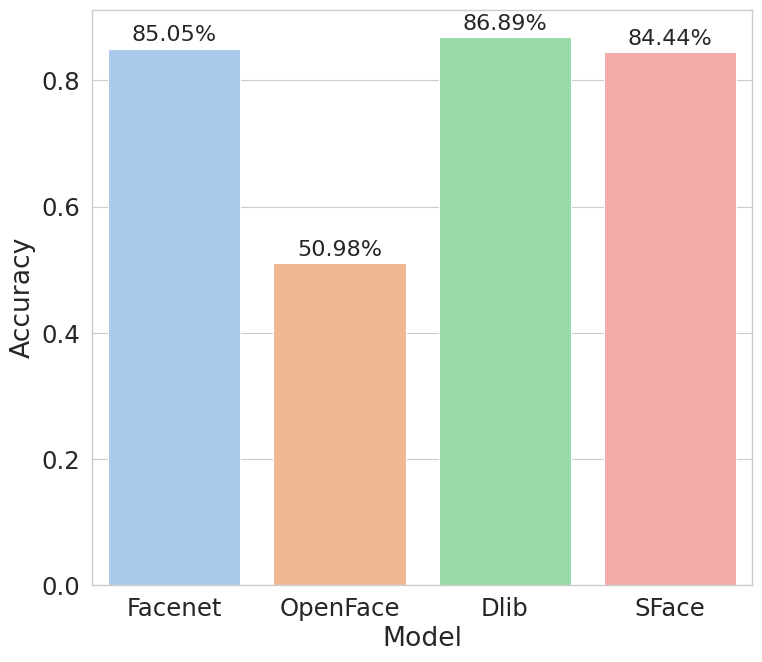

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns  # For improved aesthetics

# Set a seaborn style for better visual appeal
sns.set(style="whitegrid")

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter accuracy_df for the specified models and metric
filtered_df = accuracy_df[(accuracy_df['metric'] == 'cosine') & (accuracy_df['model'].isin(selected_models))]

# Set color palette for better distinction
colors = sns.color_palette("pastel")

# Increase font size
sns.set_context("paper", font_scale=2)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='accuracy', data=filtered_df, palette=colors, order=order)
ax.set(xlabel='Model',
       ylabel='Accuracy')

# Annotate each bar with the corresponding accuracy value (with increased font size)
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height()*100:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16)

plt.savefig("sface_acc_cos.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()


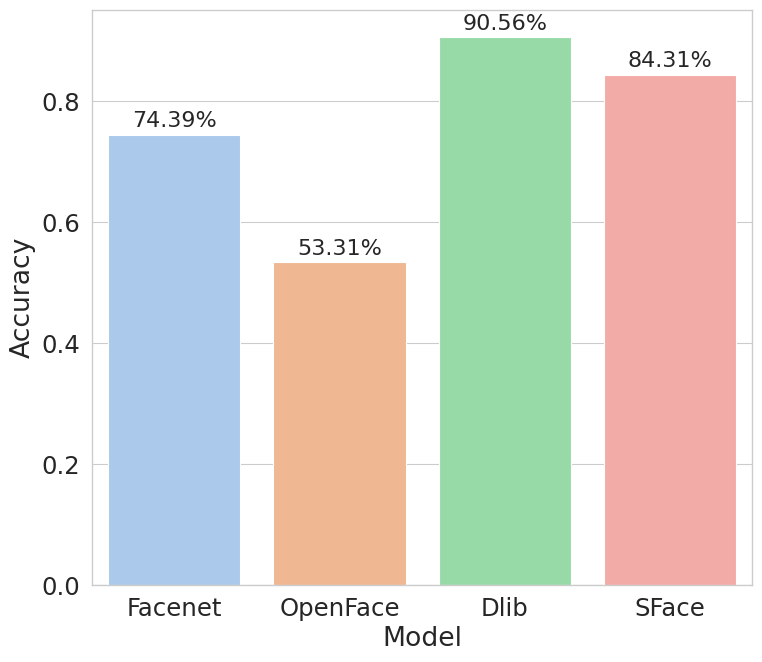

In [29]:
# euclidean accuracy

import matplotlib.pyplot as plt
import seaborn as sns  # For improved aesthetics

# Set a seaborn style for better visual appeal
sns.set(style="whitegrid")

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter accuracy_df for the specified models and metric
filtered_df = accuracy_df[(accuracy_df['metric'] == 'euclidean') & (accuracy_df['model'].isin(selected_models))]

# Set color palette for better distinction
colors = sns.color_palette("pastel")

# Increase font size
sns.set_context("paper", font_scale=2)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='accuracy', data=filtered_df, palette=colors, order=order)
ax.set(xlabel='Model',
       ylabel='Accuracy')

# Annotate each bar with the corresponding accuracy value
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height()*100:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16)

plt.savefig("sface_acc_euc.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()


In [30]:
#cosine time

import matplotlib.pyplot as plt
import seaborn as sns  # For improved aesthetics

# Set a seaborn style for better visual appeal
sns.set(style="whitegrid")

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter average_time_df for the specified models and metric
filtered_time_df = average_time_df[(average_time_df['metric'] == 'cosine') & (average_time_df['model'].isin(selected_models))]

# Set color palette for better distinction
colors = sns.color_palette("pastel")

# Increase font size
sns.set_context("paper", font_scale=2)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='time', data=filtered_time_df, palette=colors, order=order)
ax.set(xlabel='Model',
       ylabel='Time (seconds)')

# Annotate each bar with the corresponding time value
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f} s", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16)

plt.savefig("sface_time_cos.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()


KeyError: 'metric'

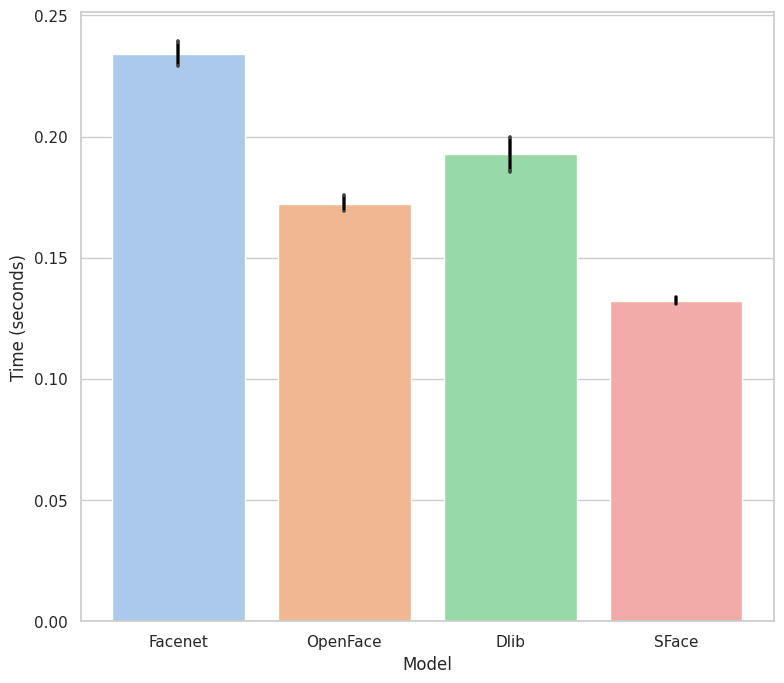

In [23]:
import numpy as np
from scipy import stats

# Calculate mean and standard error of the mean for each model
mean_time = df.groupby(['model'])['time'].mean()
sem = df.groupby(['model'])['time'].sem()

# Calculate confidence interval
confidence_level = 0.95  # You can adjust the confidence level as needed
t_value = stats.t.ppf((1 + confidence_level) / 2, len(df.groupby(['model'])) - 1)
ci = sem * t_value

# Combine mean, SEM, and CI into a DataFrame for easy plotting
average_time_df = pd.DataFrame({'model': mean_time.index, 'time': mean_time.values, 'sem': sem.values, 'ci': ci.values})

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter the original dataframe for the specified models and metric
filtered_df = df[(df['metric'] == 'cosine') & (df['model'].isin(selected_models))]

# Plot the bar chart with error bars representing confidence intervals
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='time', data=filtered_df, palette=colors, order=order)
ax.set(xlabel='Model', ylabel='Time (seconds)')

# Add error bars representing confidence intervals
for i, model in enumerate(filtered_df['model'].unique()):
    model_data = filtered_df[filtered_df['model'] == model]
    ci_val = average_time_df.loc[average_time_df['model'] == model, 'ci'].iloc[0]
    ax.errorbar(i, model_data['time'].mean(), yerr=ci_val, fmt=' ', color='black')

plt.tight_layout()
plt.savefig("sface_time_cos_with_ci.pdf", format="pdf", bbox_inches="tight")
plt.show()


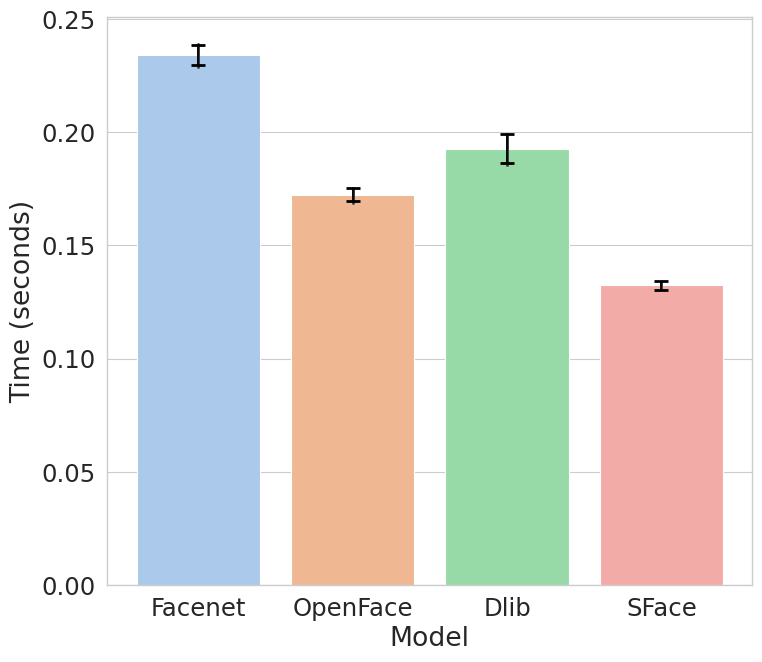

In [40]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for plotting

# Calculate mean and standard error of the mean for each model
mean_time = df.groupby(['model'])['time'].mean()
sem = df.groupby(['model'])['time'].sem()

# Calculate confidence interval
confidence_level = 0.95  # You can adjust the confidence level as needed
t_value = stats.t.ppf((1 + confidence_level) / 2, len(df.groupby(['model'])) - 1)
ci = sem * t_value

# Combine mean, SEM, and CI into a DataFrame for easy plotting
average_time_df = pd.DataFrame({'model': mean_time.index, 'time': mean_time.values, 'sem': sem.values, 'ci': ci.values})

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter the original dataframe for the specified models and metric
filtered_df = df[(df['metric'] == 'cosine') & (df['model'].isin(selected_models))]

# Plot the bar chart with error bars representing confidence intervals
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='time', data=filtered_df, palette=colors, order=order)
ax.set(xlabel='Model', ylabel='Time (seconds)')

# Add error bars with horizontal caps for visual clarity
for i, model in enumerate(filtered_df['model'].unique()):
    model_data = filtered_df[filtered_df['model'] == model]
    ci_val = average_time_df.loc[average_time_df['model'] == model, 'ci'].iloc[0]

    # Use caps for horizontal error bars
    ax.errorbar(i, model_data['time'].mean(), yerr=ci_val, fmt='none', capsize=5, capthick=2, color='black')

plt.tight_layout()
plt.savefig("sface_time_cos_with_ci.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [25]:
#euclidean time

import matplotlib.pyplot as plt
import seaborn as sns  # For improved aesthetics

# Set a seaborn style for better visual appeal
sns.set(style="whitegrid")

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter average_time_df for the specified models and metric
filtered_time_df = average_time_df[(average_time_df['metric'] == 'euclidean') & (average_time_df['model'].isin(selected_models))]

# Set color palette for better distinction
colors = sns.color_palette("pastel")

# Increase font size
sns.set_context("paper", font_scale=2)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='time', data=filtered_time_df, palette=colors, order=order)
ax.set(xlabel='Model',
       ylabel='Time (seconds)')

# Annotate each bar with the corresponding time value
for p in bar_plot.patches:
    bar_plot.annotate(f"{p.get_height():.2f} s", (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16)
    
    # Adjust y-axis range to fit the annotations
max_time = max(filtered_time_df['time'])
plt.ylim(0, max_time + 0.02)

plt.savefig("sface_time_euc.pdf", format="pdf")
plt.tight_layout()
plt.show()


KeyError: 'metric'

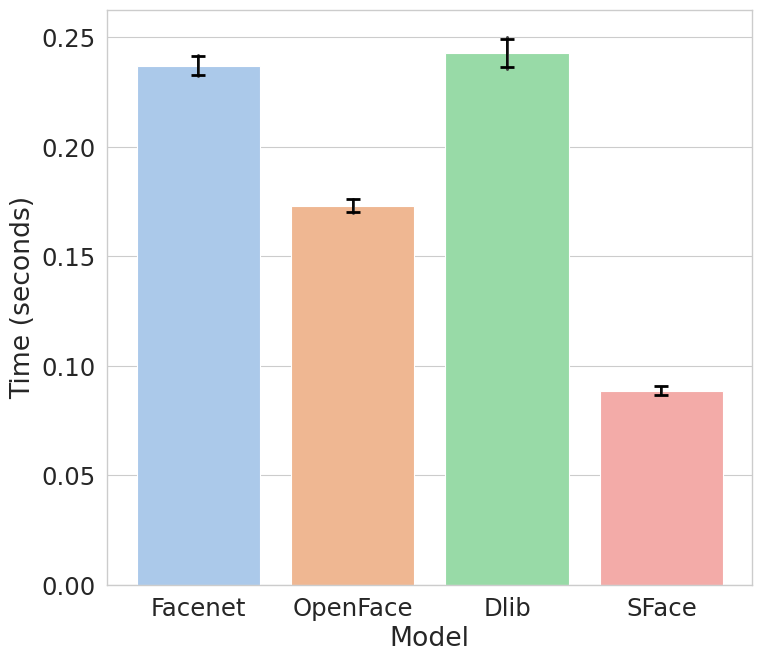

In [41]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for plotting

# Calculate mean and standard error of the mean for each model
mean_time = df.groupby(['model'])['time'].mean()
sem = df.groupby(['model'])['time'].sem()

# Calculate confidence interval
confidence_level = 0.95  # You can adjust the confidence level as needed
t_value = stats.t.ppf((1 + confidence_level) / 2, len(df.groupby(['model'])) - 1)
ci = sem * t_value

# Combine mean, SEM, and CI into a DataFrame for easy plotting
average_time_df = pd.DataFrame({'model': mean_time.index, 'time': mean_time.values, 'sem': sem.values, 'ci': ci.values})

# Specify the desired models
selected_models = ['Facenet', 'OpenFace', 'Dlib', 'SFace']
order = selected_models

# Filter the original dataframe for the specified models and metric
filtered_df = df[(df['metric'] == 'euclidean') & (df['model'].isin(selected_models))]

# Plot the bar chart with error bars representing confidence intervals
fig, ax = plt.subplots(figsize=(8, 7))
bar_plot = sns.barplot(x='model', y='time', data=filtered_df, palette=colors, order=order)
ax.set(xlabel='Model', ylabel='Time (seconds)')

# Add error bars with horizontal caps for visual clarity
for i, model in enumerate(filtered_df['model'].unique()):
    model_data = filtered_df[filtered_df['model'] == model]
    ci_val = average_time_df.loc[average_time_df['model'] == model, 'ci'].iloc[0]

    # Use caps for horizontal error bars
    ax.errorbar(i, model_data['time'].mean(), yerr=ci_val, fmt='none', capsize=5, capthick=2, color='black')

plt.tight_layout()
plt.savefig("sface_time_euc_with_ci.pdf", format="pdf", bbox_inches="tight")
plt.show()
